<a href="https://colab.research.google.com/github/DrFrank25/Gromacs-Step-by-step-tutorial/blob/main/generate_high_quality_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Input the PDB code of your choice below*


In [3]:
#@title pdb2png

PDB_id = '4i5s' #@param {type:"string"}

*Cloning and Installation.*

In [4]:
!git clone https://github.com/hgbrian/pdb2png

Cloning into 'pdb2png'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 80 (delta 36), reused 48 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (80/80), 6.27 MiB | 29.87 MiB/s, done.
Resolving deltas: 100% (36/36), done.


*Install pymol without conda*

In [5]:
!git clone https://github.com/schrodinger/pymol-open-source.git
!git clone https://github.com/rcsb/mmtf-cpp.git
!mv mmtf-cpp/include/mmtf* pymol-open-source/include/
%cd /content/pymol-open-source
!apt-get update
!apt-get install libglew-dev
!apt-get install libglm-dev
!python setup.py -q install

Cloning into 'pymol-open-source'...
remote: Enumerating objects: 58251, done.
remote: Counting objects: 100% (2131/2131), done.
remote: Compressing objects: 100% (418/418), done.
remote: Total 58251 (delta 1927), reused 1713 (delta 1713), pack-reused 56120 (from 3)
Receiving objects: 100% (58251/58251), 57.43 MiB | 23.38 MiB/s, done.
Resolving deltas: 100% (47969/47969), done.
Cloning into 'mmtf-cpp'...
remote: Enumerating objects: 880, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 880 (delta 11), reused 25 (delta 9), pack-reused 846 (from 1)
Receiving objects: 100% (880/880), 53.41 MiB | 35.66 MiB/s, done.
Resolving deltas: 100% (495/495), done.
/content/pymol-open-source
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://secu

*Import the Required Libraries*

In [6]:
import os
import requests
import time
from random import random

def download_pdb_file(pdb_id: str) -> str:
    """Download pdb file as a string from rcsb.org"""
    PDB_DIR ="."
    os.makedirs(PDB_DIR, exist_ok=True)

    # url or pdb_id
    if pdb_id.startswith('http'):
        url = pdb_id
        filename = url.split('/')[-1]
    elif pdb_id.endswith(".pdb"):
        return pdb_id
    else:
        if pdb_id.startswith("AF"):
            url = f"https://alphafold.ebi.ac.uk/files/{pdb_id}-model_v3.pdb"
        else:
            url = f"http://files.rcsb.org/view/{pdb_id}.pdb"
        filename = f'{pdb_id}.pdb'

    cache_path = os.path.join(PDB_DIR, filename)
    if os.path.exists(cache_path):
        return cache_path

    pdb_req = requests.get(url)
    pdb_req.raise_for_status()
    open(cache_path, 'w').write(pdb_req.text)
    return cache_path

In [7]:
import pdb2png
%cd /content/pdb2png
!python pdb2png.py -h

/content/pdb2png
usage: pdb2png.py [-h] [--protein_rotate PROTEIN_ROTATE]
                  [--protein_color PROTEIN_COLOR]
                  [--protein_zoom PROTEIN_ZOOM] [--hetatm_color HETATM_COLOR]
                  [--ligand_id LIGAND_ID] [--ligand_chain LIGAND_CHAIN]
                  [--ligand_zoom LIGAND_ZOOM] [--ligand_color LIGAND_COLOR]
                  [--show_water] [--render_style RENDER_STYLE] [--width WIDTH]
                  [--height HEIGHT]
                  pdb_file

Visualize a PDB file.

positional arguments:
  pdb_file              Path to the PDB file to visualize.

options:
  -h, --help            show this help message and exit
  --protein_rotate PROTEIN_ROTATE
                        protein rotation in degrees, comma-delimited
  --protein_color PROTEIN_COLOR
                        protein color (e.g., red or 250,50,50,50,50,200)
  --protein_zoom PROTEIN_ZOOM
                        protein zoom (e.g., -40 (zoomed in) to 100 (zoomed
                        

*Open PDB code*

In [8]:
%cd /content/pdb2png

if PDB_id == '':
  PDB_id = "4i5s"

pdb_file = download_pdb_file(PDB_id)
!python pdb2png.py {pdb_file}

/content/pdb2png


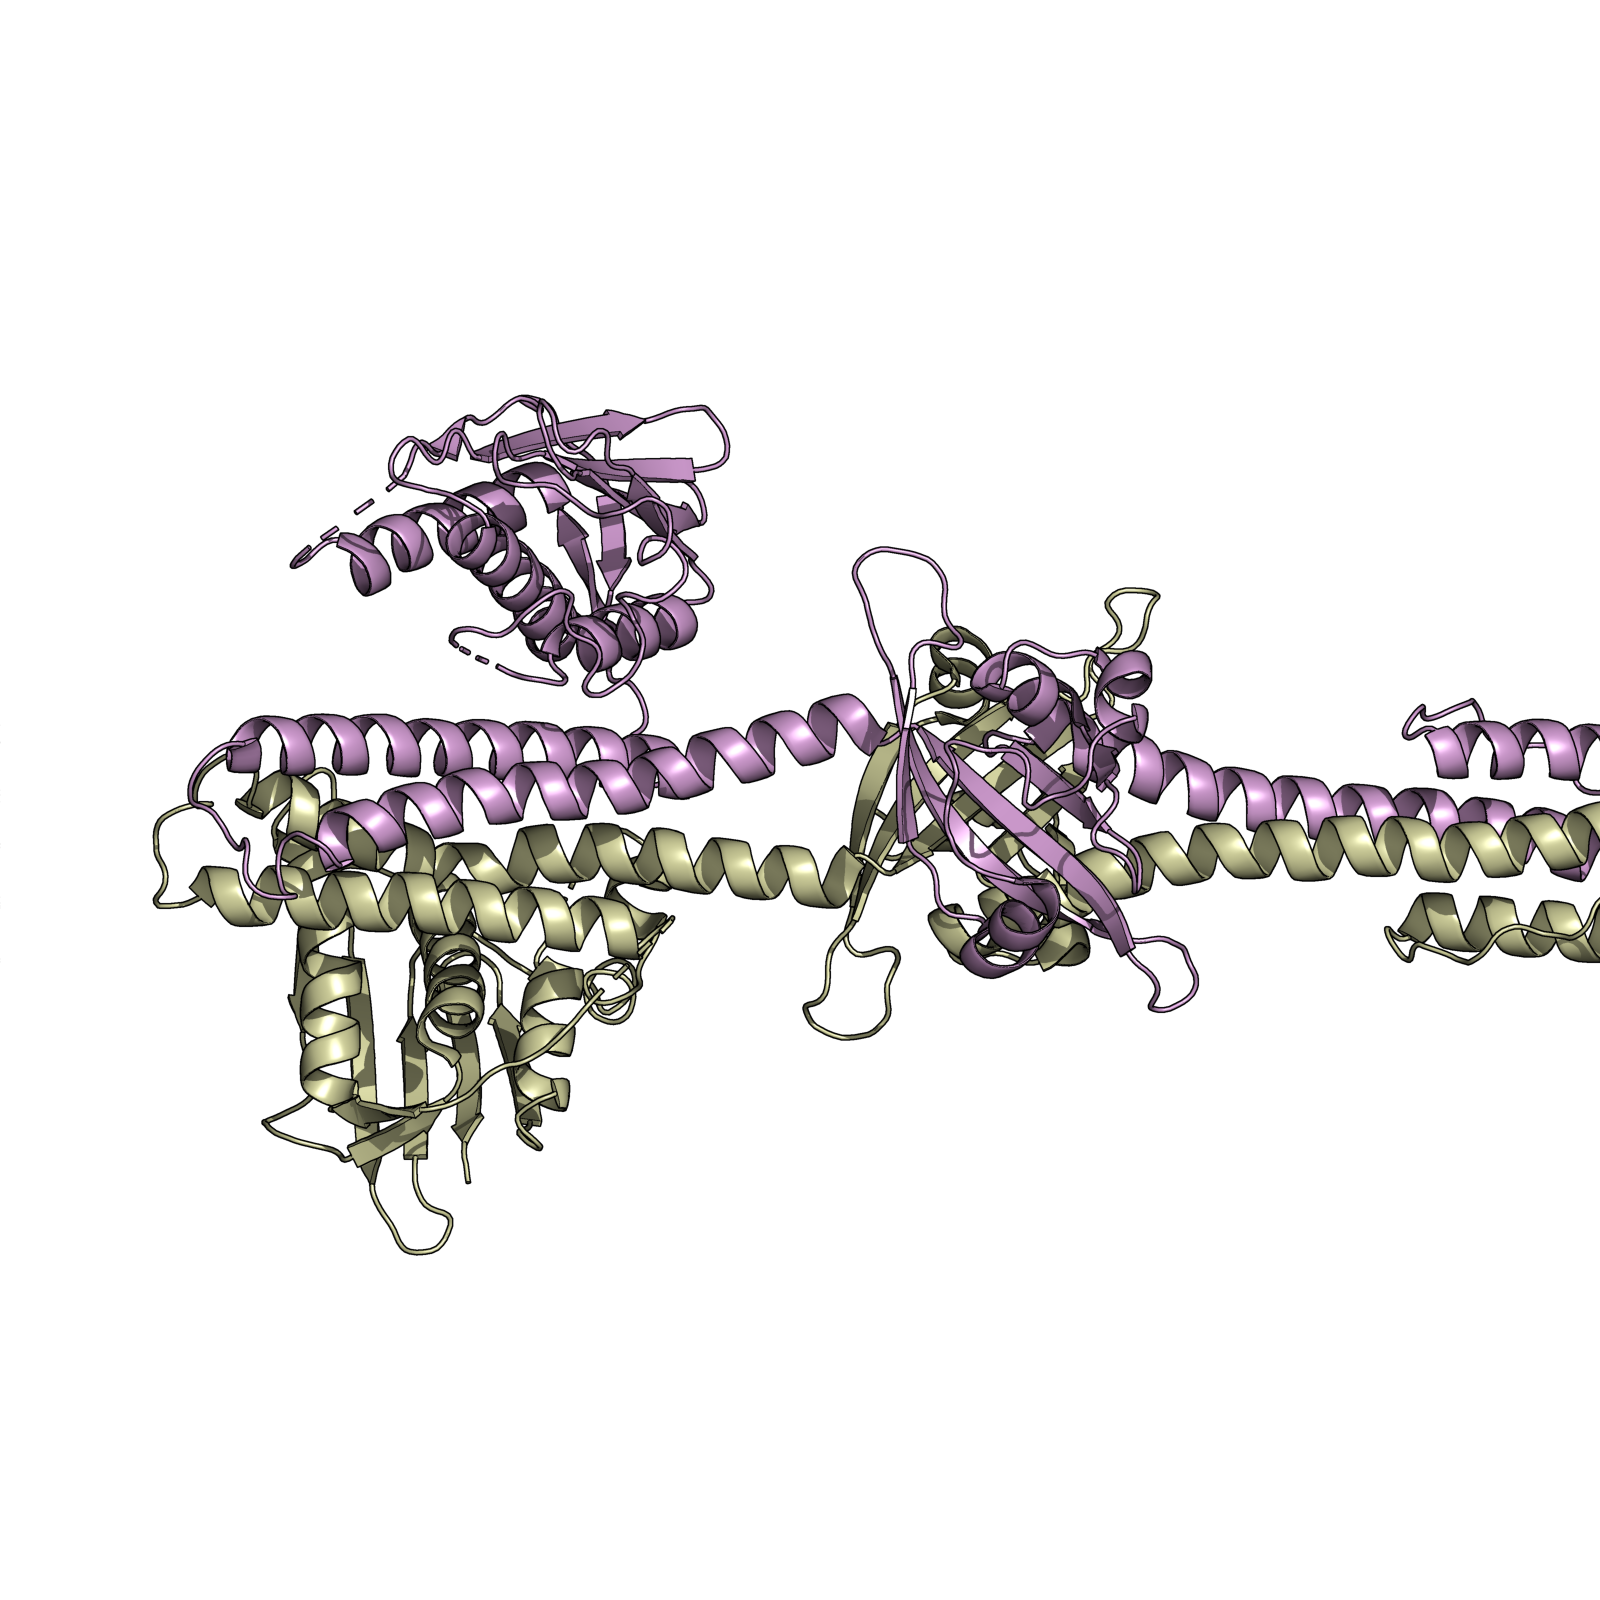

In [9]:
from IPython.display import Image
Image(f"{PDB_id}.png")

In [10]:
!python pdb2png.py {pdb_file} --render_style default_bw

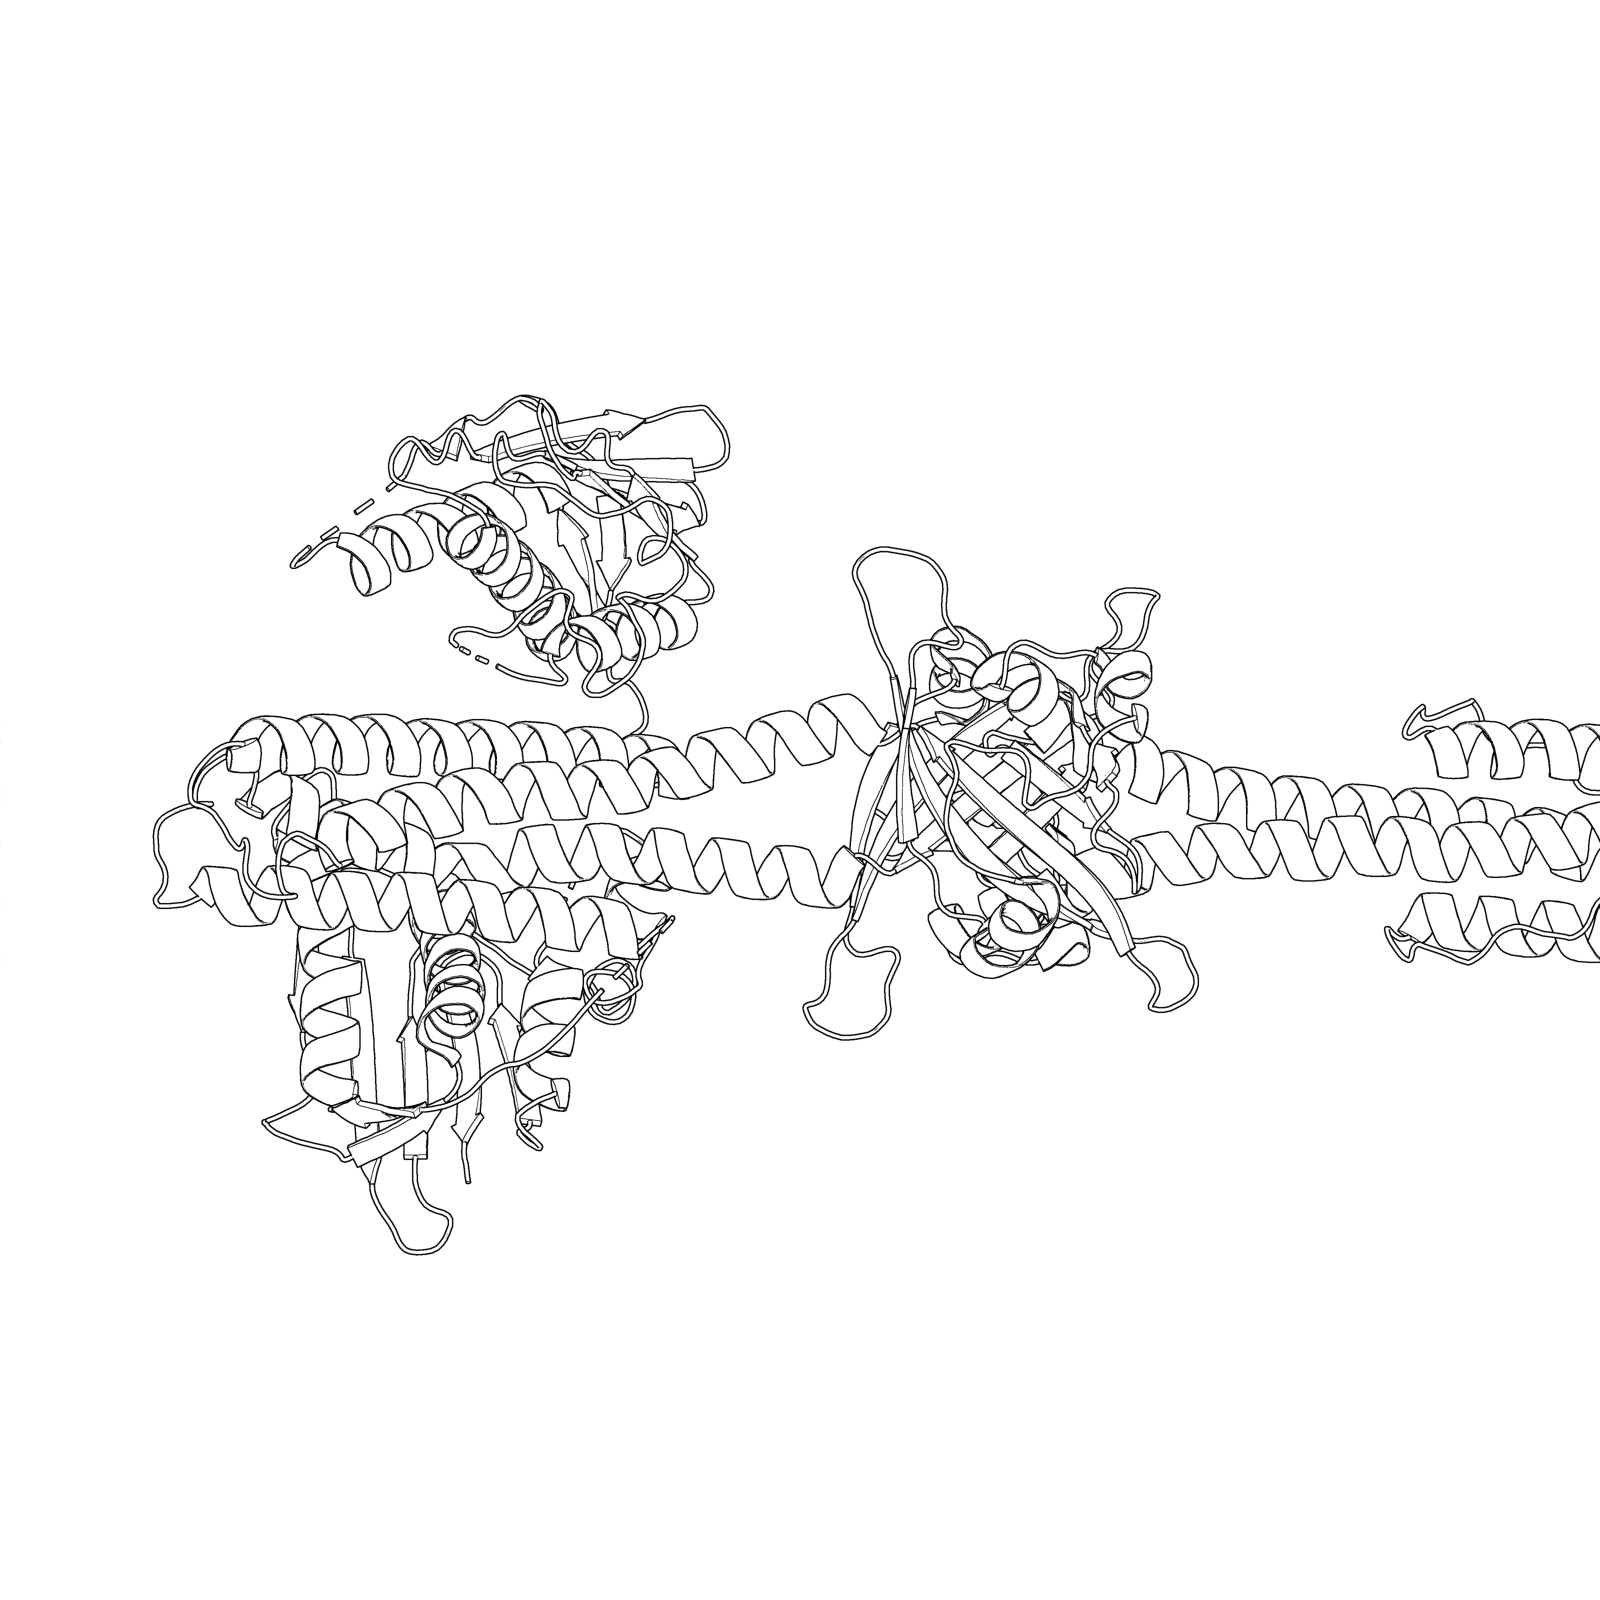

In [11]:
from IPython.display import Image
Image(f"{PDB_id}.png")

In [12]:
!python pdb2png.py {pdb_file} --hetatm_color red --ligand_id X8Z --ligand_color 1,1,0 --protein_rotate 45,70,0 --render_style default

ExecutiveWindowZoom-Warning: selection doesn't specify any coordinates.


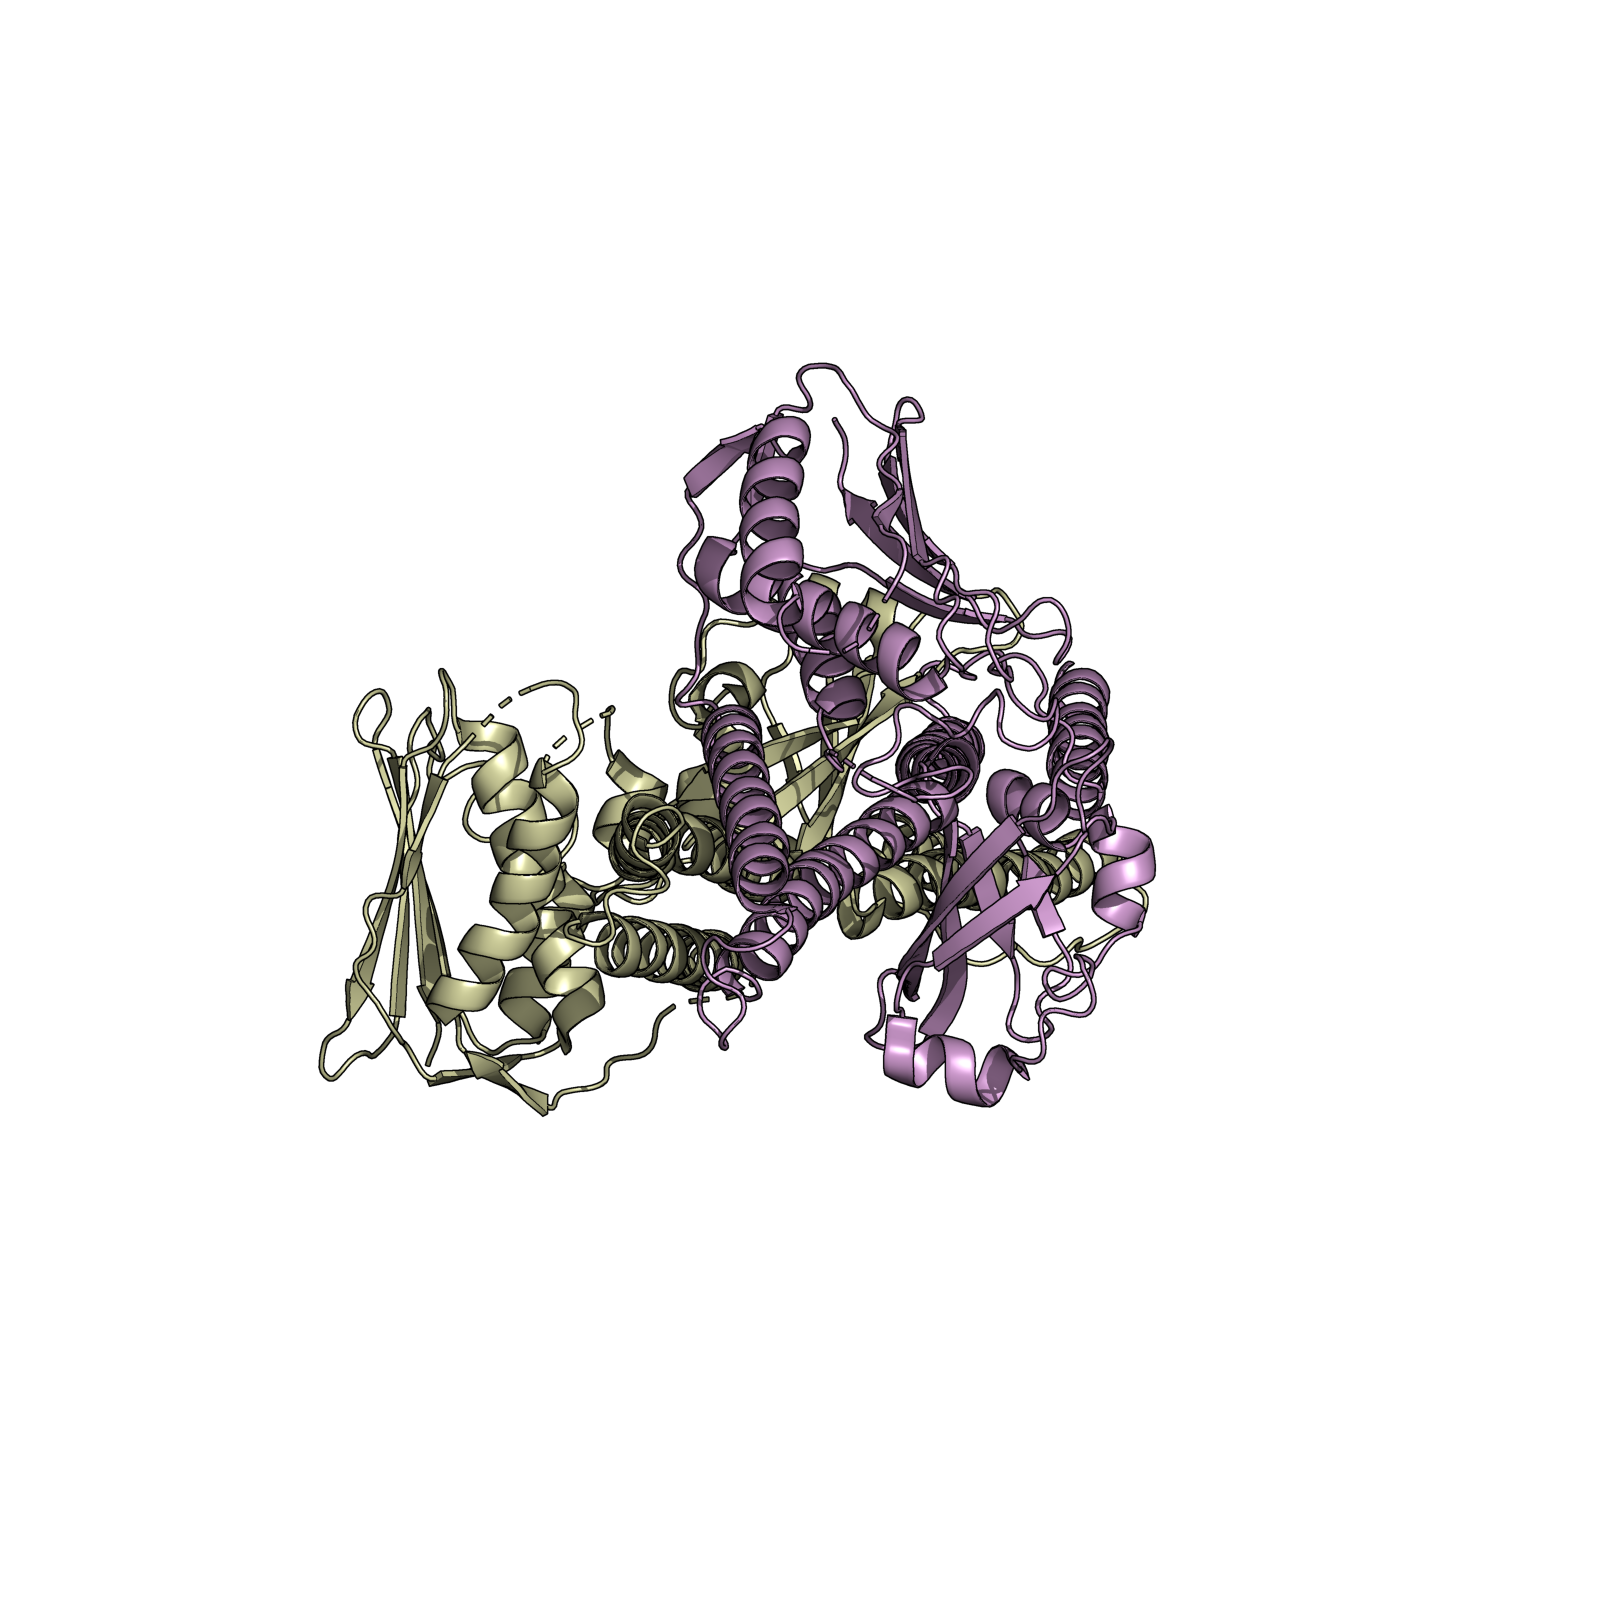

In [13]:
from IPython.display import Image
Image(f"{PDB_id}.png")

In [14]:
!python pdb2png.py {pdb_file}

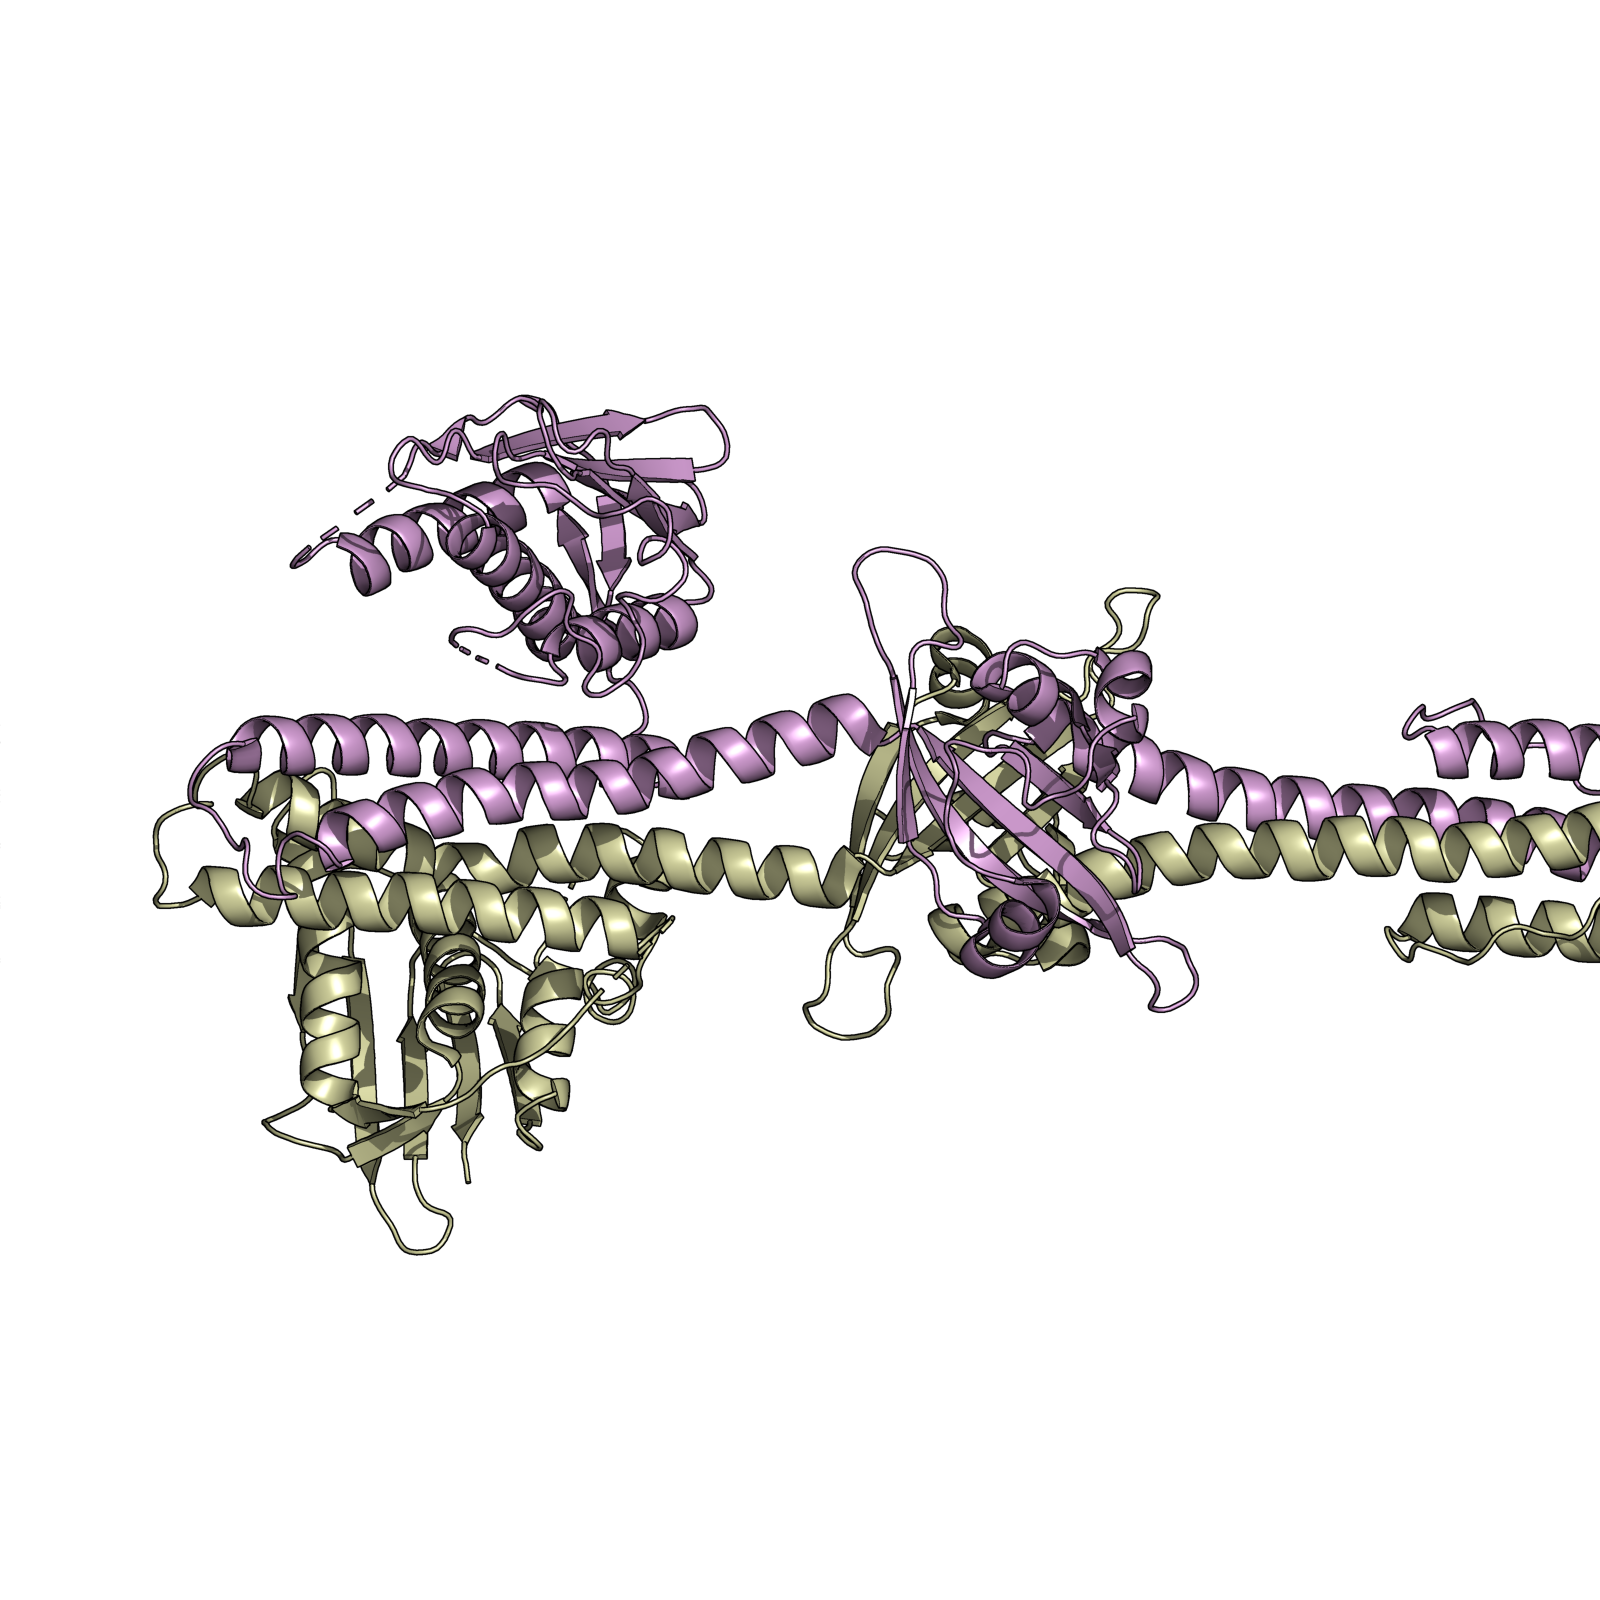

In [15]:
from IPython.display import Image
Image(f"{PDB_id}.png")